# Creating the figure of the velocity of the star for Mathieu's paper

@author:Eva Laplace

Date:11.06.2018


In [20]:
%matplotlib inline
#  notebook

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from spectral_cube import SpectralCube
import aplpy
from astropy import units as u
import math

# Use LaTeX in the plots
from matplotlib import rc
fsize = 20
rc('font',**{'family':'serif','serif':['Times'],'size'   : fsize})
rc('text', usetex=True)

# Global constants
FILE_NAME = "/scratch/mathieu/vfts682_data/ADP_WFI_30DOR_RGBcube_V1.0.fits"

# Calculate relevant quantities

In [100]:
# Coordinates (all Fk5 and decimal)
ra_R136 = 84.675
dec_R136 = -69.1
rad_R136 = 0.01 # In deg

ra_NGC2070 = 84.675
dec_NGC2070 = -69.1
rad_NGC2070 = 3.5 # In deg

ra_NGC2060 = 84.46483
dec_NGC2060 = -69.17325
rad_NGC2060 = 1.7 # In deg

###  VFTS 682

In [80]:
# Star VFTS 682
# position on the sky (degrees)
RAvfts682   = 84.73136339876477
e_RAvfts682 = 0.036321212008208974
DEvfts682   = -69.07411071794998
e_DEvfts682 = 0.04825647078875183
# Age
age_vfts682 = 1 * 1e6
e_age_vfts682 = 0.2 * 1e6

# Draw arrow of VFTS 682
d_ra = 0.102976611081 / 1000# In arcsec/yr
d_dec = 0.0855134899438 / 1000# In arcsec/yr

e_d_ra = 0.0797415003151 / 1000
e_d_dec = 0.0999780525252 / 1000

# HST data
d_ra_hst = 0.01 / 1000
e_d_ra_hst = 0.13 / 1000
d_dec_hst = 0.2 / 1000
e_d_dec_hst = 0.1 / 1000


### VFTS 016

In [81]:
ra_vfts016 = 84.287006884
dec_vfts016 = -69.122324251
d_ra016 = -0.336 / 1000 # In marcsec/yr
d_dec016 = -0.038 / 1000 # In marcsec/yr
e_d_ra016 = 0.046 / 1000
e_d_dec016 = 0.045 / 1000

# Age
age_016 = 0.7 * 1e6
e_age_016 = 0.1 * 1e6

### VFTS 072

In [86]:
ra_vfts072 = 84.393598431
dec_vfts072 = -69.019490821 
d_ra_vfts072 = -0.372/ 1000# In arcsec/yr
d_dec_vfts072 = 0.125/ 1000# In arcsec/yr
e_d_ra_vfts072 = 0.05 / 1000
e_d_dec_vfts072 = 0.061 /1000

# Age
age_072 = 0.4 * 1e6
e_072_pos = 0.8 * 1e6
e_072_neg = -0.4 * 1e6

##  Save colors used in plot

In [6]:
blue = "#00E5FF"
## green = "#00E676"
# dark_
green = "#43A047"
light_green = "#64fc6c"
gold = "#FFD600"
light_gold = "#fcec0c"
light_blue = "#B2EBF2"

##  Create final figure

In [7]:
# Fix problem with ticks 
import matplotlib as mpl
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

In [62]:
fig = aplpy.FITSFigure(FILE_NAME, slices=[1])
fig.set_auto_refresh(False)
# fig.set_xaxis_coord_type('latitude')
# fig.set_yaxis_coord_type('longitude')
fig.set_theme('publication')
# Change zoom region
fig._ax1.set_xlim([2941, 4905])
fig._ax1.set_ylim([5470, 6850])

# ------------- Add objects to figure -----------------

# Add labels
size = 20
family = "sans-serif"
stretch = "ultra-expanded"
weight = "extra bold"
x_R136, y_R136 = fig.world2pixel(ra_R136, dec_R136-0.02)
l = fig._ax1.text(x_R136, y_R136, 'R136', color="b", size=size, weight=weight, family=family, stretch=stretch,
                   horizontalalignment='center',
                   verticalalignment='center')
boxprop = dict(facecolor='w',edgecolor='none',boxstyle='round,pad=0.25',alpha=0.5)
l.set_bbox(boxprop)

x_vfts016, yp_vfts016 = fig.world2pixel(ra_vfts016, dec_vfts016+0.02)
l = fig._ax1.text(x_vfts016, yp_vfts016, 'VFTS16', color="k", size=size, weight=weight, family=family, stretch=stretch,
                   horizontalalignment='center',
                   verticalalignment='center')
l.set_bbox(boxprop)

x_vfts072, yp_vfts072 = fig.world2pixel(ra_vfts072, dec_vfts072+0.02)
l = fig._ax1.text(x_vfts072, yp_vfts072, 'VFTS72', color="k", size=size, weight=weight, family=family, stretch=stretch,
                   horizontalalignment='center',
                   verticalalignment='center')
l.set_bbox(boxprop)

x_vfts682, yp_vfts682 = fig.world2pixel(RAvfts682+0.01, DEvfts682+0.04)
l = fig._ax1.text(x_vfts682, yp_vfts682, 'VFTS682', color="k", size=size, weight=weight, family=family, stretch=stretch,
                   horizontalalignment='center',
                   verticalalignment='center')
l.set_bbox(boxprop)

# Add R 136 circle
fig.show_circles(ra_R136, dec_R136, rad_R136, color="b", linewidth=1.5)

# ------------------------------------------- Script of Chris Evans ----------------------
# #016: 0.2Myr forward
# fig.show_arrows(84.287, -69.12232, -0.0523794, -0.002111, width=15, head_width=50, head_length=50, edgecolor='k', facecolor='cyan')
# #016: 0.9Myr back
# fig.show_arrows(84.287, -69.12232, 0.39284571, 0.015833, width=3, head_width=50, head_length=50, edgecolor='lightgreen', facecolor='lightgreen')
# fig.show_arrows(84.287, -69.12232, 0.23570742, 0.0095, width=25,
# head_width=50, head_length=50, edgecolor='red', facecolor='red')#min PMra max PMdec
# fig.show_arrows(84.287, -69.12232, 0.20343796, 0.0207500, width=15, head_width=50, head_length=50, edgecolor='lightcoral', facecolor='lightcoral')
# #max PMra min PMdec
# fig.show_arrows(84.287, -69.12232, 0.26797689, -0.0017500, width=15, head_width=50, head_length=50, edgecolor='lightcoral', facecolor='lightcoral')

# ---------------------------------------------------------------------------------------------

len_factor = 0.4e6 # Forward 0.4 Myr

# VFTS 016
fig.show_arrows(ra_vfts016, dec_vfts016, 
                len_factor * (d_ra016 * u.arcsec).to(u.deg).value / np.cos((dec_vfts016 * u.deg).to(u.rad)).value, 
                len_factor * (d_dec016 * u.arcsec).to(u.deg).value, 
                color=gold, width=5, lw=3,head_length=25, head_width=25)

# Prolongation in the past
fig.show_arrows(ra_vfts016, dec_vfts016, 
                    -(age_016 * d_ra016 * u.arcsec).to(u.deg).value / np.cos((dec_vfts016 * u.deg).to(u.rad)).value, 
                -(age_016 * d_dec016 * u.arcsec).to(u.deg).value, 
                color=light_gold, width=0, lw=2, head_length=0, head_width=0, )
# Errors
fig.show_arrows(ra_vfts016, dec_vfts016, 
                -(age_016 * (d_ra016 - e_d_ra016) * u.arcsec).to(u.deg).value / np.cos((dec_vfts016 * u.deg).to(u.rad)).value, 
                -(age_016 * (d_dec016 + e_d_dec016) * u.arcsec).to(u.deg).value, 
                color=gold, width=0, lw=2, head_length=0, head_width=0, )
fig.show_arrows(ra_vfts016, dec_vfts016, 
                -(age_016 * (d_ra016 + e_d_ra016) * u.arcsec).to(u.deg).value / np.cos((dec_vfts016 * u.deg).to(u.rad)).value, 
                -(age_016 * (d_dec016 - e_d_dec016) * u.arcsec).to(u.deg).value, 
                color=gold, width=0, lw=2, head_length=0, head_width=0, )

# -------------------------------------------------------------------

# VFTS 072
fig.show_arrows(ra_vfts072, dec_vfts072,
                len_factor * (d_ra_vfts072 * u.arcsec).to(u.deg).value / np.cos((dec_vfts072 * u.deg).to(u.rad)).value, 
                len_factor * (d_dec_vfts072 * u.arcsec).to(u.deg).value, 
                color=gold, width=5, lw=3,head_length=25, head_width=25)

fig.show_arrows(ra_vfts072, dec_vfts072, 
                -(age_072 * d_ra_vfts072 * u.arcsec).to(u.deg).value / np.cos((dec_vfts072 * u.deg).to(u.rad)).value, 
                -(age_072 * d_dec_vfts072 * u.arcsec).to(u.deg).value, 
                color=light_gold, width=0, lw=2, head_length=0, head_width=0, linestyle='-')
# Errors
fig.show_arrows(ra_vfts072, dec_vfts072, 
                -(age_072 * (d_ra_vfts072 - e_d_ra_vfts072) * u.arcsec).to(u.deg).value / np.cos((dec_vfts072 * u.deg).to(u.rad)).value, 
                -(age_072 * (d_dec_vfts072 + e_d_dec_vfts072) * u.arcsec).to(u.deg).value, 
                  color=gold, width=0, lw=2, head_length=0, head_width=0, linestyle='-')
fig.show_arrows(ra_vfts072, dec_vfts072, 
                -(age_072 * (d_ra_vfts072 + e_d_ra_vfts072) * u.arcsec).to(u.deg).value / np.cos((dec_vfts072 * u.deg).to(u.rad)).value, 
                -(age_072 * (d_dec_vfts072 - e_d_dec_vfts072) * u.arcsec).to(u.deg).value, 
                  color=gold, width=0, lw=2, head_length=0, head_width=0, linestyle='-')

# VFTS 682
# --------------------------
# best value HST
fig.show_arrows(RAvfts682, DEvfts682, 
                len_factor * (d_ra_hst * u.arcsec).to(u.deg).value / np.cos((DEvfts682 * u.deg).to(u.rad)).value, 
                len_factor * (d_dec_hst * u.arcsec).to(u.deg).value, 
                color=green, width=5, lw=3,head_length=25, head_width=25)

# prolungation in the past (Gaia only)
fig.show_arrows(RAvfts682, DEvfts682, 
                -(age_vfts682 * d_ra_hst * u.arcsec).to(u.deg).value / np.cos((DEvfts682 * u.deg).to(u.rad)).value, 
                -(age_vfts682 * d_dec_hst * u.arcsec).to(u.deg).value, 
                color=light_green, width=0, lw=2, head_length=0, head_width=0, )

# Errors
fig.show_arrows(RAvfts682, DEvfts682, 
                -(age_vfts682 * (d_ra_hst - e_d_ra_hst) * u.arcsec).to(u.deg).value / np.cos((DEvfts682 * u.deg).to(u.rad)).value,
                -(age_vfts682 * (d_dec_hst + e_d_dec_hst) * u.arcsec).to(u.deg).value,
                 color=green, width=0, lw=2, head_length=0, head_width=0, )
fig.show_arrows(RAvfts682, DEvfts682, 
                -(age_vfts682 * (d_ra_hst + e_d_ra_hst) * u.arcsec).to(u.deg).value / np.cos((DEvfts682 * u.deg).to(u.rad)).value,
                -(age_vfts682 * (d_dec_hst - e_d_dec_hst) * u.arcsec).to(u.deg).value,
                 color=green, width=0, lw=2, head_length=0, head_width=0, )


# best value Gaia only
fig.show_arrows(RAvfts682, DEvfts682, 
                len_factor * (d_ra * u.arcsec).to(u.deg).value / np.cos((DEvfts682 * u.deg).to(u.rad)).value, 
                len_factor * (d_dec * u.arcsec).to(u.deg).value, 
                color=gold, width=5, lw=3,head_length=25, head_width=25)

# prolungation in the past (Gaia only)
fig.show_arrows(RAvfts682, DEvfts682, 
                -(age_vfts682 * d_ra * u.arcsec).to(u.deg).value / np.cos((DEvfts682 * u.deg).to(u.rad)).value, 
                -(age_vfts682 * d_dec * u.arcsec).to(u.deg).value, 
                color=light_gold, width=0, lw=2, head_length=0, head_width=0, linestyle='-')
# positive direction
fig.show_arrows(RAvfts682, DEvfts682, 
                (age_vfts682 * (d_ra - e_d_ra) * u.arcsec).to(u.deg).value / np.cos((DEvfts682 * u.deg).to(u.rad)).value,
                (age_vfts682 * (d_dec + e_d_dec) * u.arcsec).to(u.deg).value,
                 color=gold, width=0, lw=2, head_length=0, head_width=0, linestyle='-')
fig.show_arrows(RAvfts682, DEvfts682, 
                (age_vfts682 * (d_ra + e_d_ra) * u.arcsec).to(u.deg).value / np.cos((DEvfts682 * u.deg).to(u.rad)).value,
                (age_vfts682 * (d_dec - e_d_dec) * u.arcsec).to(u.deg).value,
                 color=gold, width=0, lw=2, head_length=0, head_width=0, linestyle='-')



# Errors
fig.show_arrows(RAvfts682, DEvfts682, 
                -(age_vfts682 * (d_ra - e_d_ra) * u.arcsec).to(u.deg).value / np.cos((DEvfts682 * u.deg).to(u.rad)).value,
                -(age_vfts682 * (d_dec + e_d_dec) * u.arcsec).to(u.deg).value,
                 color=gold, width=0, lw=2, head_length=0, head_width=0, linestyle='-')
fig.show_arrows(RAvfts682, DEvfts682, 
                -(age_vfts682 * (d_ra + e_d_ra) * u.arcsec).to(u.deg).value / np.cos((DEvfts682 * u.deg).to(u.rad)).value,
                -(age_vfts682 * (d_dec - e_d_dec) * u.arcsec).to(u.deg).value,
                 color=gold, width=0, lw=2, head_length=0, head_width=0, linestyle='-')


# Add circles on stars
star_size = 2e-3
fig.show_circles(ra_vfts016, dec_vfts016, star_size, facecolor=gold, edgecolor="black")
fig.show_circles(ra_vfts072, dec_vfts072, star_size, facecolor=gold, edgecolor="black")
fig.show_circles(RAvfts682, DEvfts682, star_size, facecolor=gold, edgecolor="black")

# ---------------------------------------------------------------------------------------------

# Change ticks
fig.tick_labels.set_xformat("hh:mm:ss")
fig.tick_labels.set_yformat("dd:mm")
fig.tick_labels.set_font(size='medium')
fig.ticks.set_linewidth(2)
fig.ticks.set_length(12)
fig.ticks.set_color('white')

# Axis labels
fig.axis_labels.set_xtext('Right Ascension (J2000)')
fig.axis_labels.set_ytext('Declination (J2000)')

# Change frame
fig.frame.set_linewidth(3)  # points
fig.frame.set_color('White')

# Show plot + save
fig.show_rgb('/scratch/mathieu/vfts682_data/rgb_image.eps')
# fig.savefig('/scratch/mathieu/PLOTS_TMP/Figure1_corrected.pdf', dpi=300)




KeyboardInterrupt: 

Considering the correlations in the data below

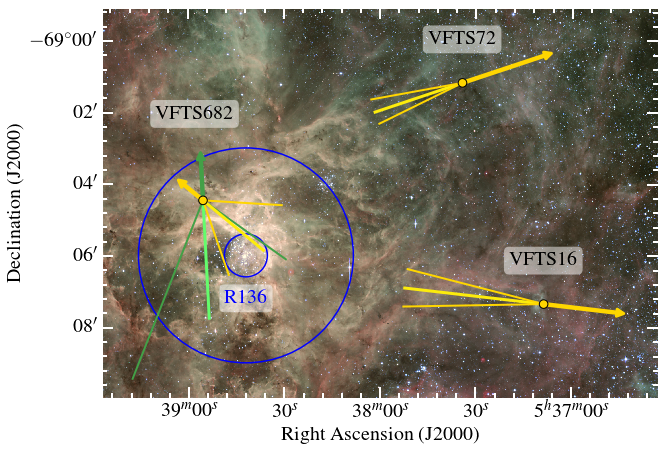

In [102]:
### CONSIDERING CORRELATIONS
fig = aplpy.FITSFigure(FILE_NAME, slices=[1])
fig.set_auto_refresh(False)
# fig.set_xaxis_coord_type('latitude')
# fig.set_yaxis_coord_type('longitude')
fig.set_theme('publication')

# Change zoom region
fig._ax1.set_xlim([2941, 4905])
fig._ax1.set_ylim([5470, 6850])

# ------------- Add objects to figure -----------------
# Add labels
size = 20
family = "sans-serif"
stretch = "ultra-expanded"
weight = "extra bold"
x_R136, y_R136 = fig.world2pixel(ra_R136, dec_R136-0.02)
l = fig._ax1.text(x_R136, y_R136, 'R136', color="b", size=size, weight=weight, family=family, stretch=stretch,
                   horizontalalignment='center',
                   verticalalignment='center')
boxprop = dict(facecolor='w',edgecolor='none',boxstyle='round,pad=0.25',alpha=0.5)
l.set_bbox(boxprop)

x_vfts016, yp_vfts016 = fig.world2pixel(ra_vfts016, dec_vfts016+0.02)
l = fig._ax1.text(x_vfts016, yp_vfts016, 'VFTS16', color="k", size=size, weight=weight, family=family, stretch=stretch,
                   horizontalalignment='center',
                   verticalalignment='center')
l.set_bbox(boxprop)

x_vfts072, yp_vfts072 = fig.world2pixel(ra_vfts072, dec_vfts072+0.02)
l = fig._ax1.text(x_vfts072, yp_vfts072, 'VFTS72', color="k", size=size, weight=weight, family=family, stretch=stretch,
                   horizontalalignment='center',
                   verticalalignment='center')
l.set_bbox(boxprop)

x_vfts682, yp_vfts682 = fig.world2pixel(RAvfts682+0.01, DEvfts682+0.04)
l = fig._ax1.text(x_vfts682, yp_vfts682, 'VFTS682', color="k", size=size, weight=weight, family=family, stretch=stretch,
                   horizontalalignment='center',
                   verticalalignment='center')
l.set_bbox(boxprop)

# Add R 136 circle
fig.show_circles(ra_R136, dec_R136, rad_R136, color="b", linewidth=1.5)
fig.show_circles(ra_R136, dec_R136, 0.05, color="b", linewidth=1.5)

# ---------------------------------------------------------------------------------------------
len_factor = 0.4e6 # Forward 0.4 Myr

# VFTS 016
dx = (d_ra016 * u.arcsec).to(u.deg).value
dy = (d_dec016 * u.arcsec).to(u.deg).value
L = np.sqrt(dx**2+dy**2)
theta = np.arctan2(dy,dx) # in radians?


fig.show_arrows(ra_vfts016, dec_vfts016, 
                len_factor * dx / np.cos((dec_vfts016 * u.deg).to(u.rad)).value, 
                len_factor * dy, 
                color=gold, width=5, lw=3,head_length=25, head_width=25)

# Prolongation in the past
fig.show_arrows(ra_vfts016, dec_vfts016, 
                -age_016 * dx / np.cos((dec_vfts016 * u.deg).to(u.rad)).value, 
                -age_016 * dy, 
                color=light_gold, width=0, lw=3, head_length=0, head_width=0, )

# the angles alpha1 and alpha2 come from the calc_pm_ang.py script from Mercedes Ramos
alpha1 = 7.598912417055149*math.pi/180. # radians
beta1 = theta-alpha1
dx1 = L*np.cos(beta1)
dy1 = L*np.sin(beta1)
alpha2 = -7.826859188077622*math.pi/180.
beta2 = theta-alpha2
dx2 = L*np.cos(beta2)
dy2 = L*np.sin(beta2)

# Errors
fig.show_arrows(ra_vfts016, dec_vfts016, 
                -(age_016 * dx1)/ np.cos((dec_vfts016 * u.deg).to(u.rad)).value, 
                -(age_016 * dy1), 
                color=gold, width=0, lw=2, head_length=0, head_width=0, )

fig.show_arrows(ra_vfts016, dec_vfts016, 
                -(age_016 * dx2)/ np.cos((dec_vfts016 * u.deg).to(u.rad)).value, 
                -(age_016 * dy2), 
                color=gold, width=0, lw=2, head_length=0, head_width=0, )

# -------------------------------------------------------------------
# # VFTS 072
dx = (d_ra_vfts072 * u.arcsec).to(u.deg).value
dy = (d_dec_vfts072 * u.arcsec).to(u.deg).value
L = np.sqrt(dx**2+dy**2)
theta = np.arctan2(dy,dx) # in radians?

fig.show_arrows(ra_vfts072, dec_vfts072,
                len_factor * dx/ np.cos((dec_vfts072 * u.deg).to(u.rad)).value, 
                len_factor * dy, 
                color=gold, width=5, lw=3,head_length=25, head_width=25)

fig.show_arrows(ra_vfts072, dec_vfts072, 
                -age_072 * dx / np.cos((dec_vfts072 * u.deg).to(u.rad)).value, 
                -age_072 * dy, 
                color=light_gold, width=0, lw=3, head_length=0, head_width=0, linestyle='-')
# # # Errors
alpha1 = 7.66568458459588*math.pi/180.0
alpha2 = -8.183197821680658*math.pi/180.0
beta1 = theta-alpha1
dx1 = L*np.cos(beta1)
dy1 = L*np.sin(beta1)
beta2 = theta-alpha2
dx2 = L*np.cos(beta2)
dy2 = L*np.sin(beta2)


fig.show_arrows(ra_vfts072, dec_vfts072, 
                -age_072 * dx1 / np.cos((dec_vfts072 * u.deg).to(u.rad)).value, 
                -age_072 * dy1, 
                color=gold, width=0, lw=2, head_length=0, head_width=0, linestyle='-')


fig.show_arrows(ra_vfts072, dec_vfts072, 
                -age_072 * dx2 / np.cos((dec_vfts072 * u.deg).to(u.rad)).value, 
                -age_072 * dy2, 
                color=gold, width=0, lw=2, head_length=0, head_width=0, linestyle='-')


# # # VFTS 682
# # # --------------------------
# # # best value HST
fig.show_arrows(RAvfts682, DEvfts682, 
                len_factor * (d_ra_hst * u.arcsec).to(u.deg).value / np.cos((DEvfts682 * u.deg).to(u.rad)).value, 
                len_factor * (d_dec_hst * u.arcsec).to(u.deg).value, 
                color=green, width=5, lw=3,head_length=25, head_width=25)

# prolungation in the past (Gaia only)
fig.show_arrows(RAvfts682, DEvfts682, 
                -(age_vfts682 * d_ra_hst * u.arcsec).to(u.deg).value / np.cos((DEvfts682 * u.deg).to(u.rad)).value, 
                -(age_vfts682 * d_dec_hst * u.arcsec).to(u.deg).value, 
                color=light_green, width=0, lw=3, head_length=0, head_width=0, )

# Errors
fig.show_arrows(RAvfts682, DEvfts682, 
                -(age_vfts682 * (d_ra_hst - e_d_ra_hst) * u.arcsec).to(u.deg).value / np.cos((DEvfts682 * u.deg).to(u.rad)).value,
                -(age_vfts682 * (d_dec_hst + e_d_dec_hst) * u.arcsec).to(u.deg).value,
                 color=green, width=0, lw=2, head_length=0, head_width=0, )
fig.show_arrows(RAvfts682, DEvfts682, 
                -(age_vfts682 * (d_ra_hst + e_d_ra_hst) * u.arcsec).to(u.deg).value / np.cos((DEvfts682 * u.deg).to(u.rad)).value,
                -(age_vfts682 * (d_dec_hst - e_d_dec_hst) * u.arcsec).to(u.deg).value,
                 color=green, width=0, lw=2, head_length=0, head_width=0, )

# # # ---------------------------end HST

# # # best value Gaia only
dx = (d_ra * u.arcsec).to(u.deg).value
dy = (d_dec * u.arcsec).to(u.deg).value
L = np.sqrt(dx**2+dy**2)
theta = np.arctan2(dy,dx) # in radians?


fig.show_arrows(RAvfts682, DEvfts682, 
                len_factor * dx / np.cos((DEvfts682 * u.deg).to(u.rad)).value, 
                len_factor * dy, 
                color=gold, width=5, lw=3,head_length=25, head_width=25)

# prolungation in the past (Gaia only)
fig.show_arrows(RAvfts682, DEvfts682, 
                -age_vfts682 * dx / np.cos((DEvfts682 * u.deg).to(u.rad)).value, 
                -age_vfts682 * dy, 
                color=light_gold, width=0, lw=3, head_length=0, head_width=0, linestyle='-')


# # Errors
alpha1 = 36.061419880524454*math.pi/180.0  ##
alpha2 = -31.38422735678875*math.pi/180.0 ##
# below accounting for errors in the pm of R136
# alpha1 = 35.96548042231934*math.pi/180.0
# alpha2 = -36.51092774773423*math.pi/180.0
# -----------------------------------

beta1 = theta-alpha1
dx1 = L*np.cos(beta1)
dy1 = L*np.sin(beta1)
beta2 = theta-alpha2
dx2 = L*np.cos(beta2)
dy2 = L*np.sin(beta2)

fig.show_arrows(RAvfts682, DEvfts682, 
                -age_vfts682 * dx1/ np.cos((DEvfts682 * u.deg).to(u.rad)).value,
                -age_vfts682 * dy1,
                 color=gold, width=0, lw=2, head_length=0, head_width=0, linestyle='-')
fig.show_arrows(RAvfts682, DEvfts682, 
                -age_vfts682 * dx2/ np.cos((DEvfts682 * u.deg).to(u.rad)).value,
                -age_vfts682 * dy2,
                color=gold, width=0, lw=2, head_length=0, head_width=0, linestyle='-')


# Add circles on stars
star_size = 2e-3
fig.show_circles(ra_vfts016, dec_vfts016, star_size, facecolor=gold, edgecolor="black")
fig.show_circles(ra_vfts072, dec_vfts072, star_size, facecolor=gold, edgecolor="black")
fig.show_circles(RAvfts682, DEvfts682, star_size, facecolor=gold, edgecolor="black")

# ---------------------------------------------------------------------------------------------

# Change ticks
fig.tick_labels.set_xformat("hh:mm:ss")
fig.tick_labels.set_yformat("dd:mm")
fig.tick_labels.set_font(size='medium')
fig.ticks.set_linewidth(2)
fig.ticks.set_length(12)
fig.ticks.set_color('white')

# Axis labels
fig.axis_labels.set_xtext('Right Ascension (J2000)')
fig.axis_labels.set_ytext('Declination (J2000)')

# Change frame
fig.frame.set_linewidth(3)  # points
fig.frame.set_color('White')

# Show plot + save
fig.show_rgb('/scratch/mathieu/vfts682_data/rgb_image.eps')
fig.savefig('/scratch/mathieu/PLOTS_TMP/Figure1_correlations_nor136err.pdf', dpi=300)